In [1]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import pyarrow.parquet as pq
import fastparquet
import pandas as pd
import glob

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
song_list = glob.glob("*trot*")
song_list

['melon_trot_최신_스테디_가사.csv',
 'melon_trot_최신_가사_인기순.csv',
 'melon_trot_가사_최신_인기순.csv',
 'melon_trot_가사_최신_인기순_4.csv',
 'melon_trot_가사_최신_인기순_2.csv',
 'melon_trot_가사_최신_인기순_3.csv']

In [3]:
songs = []
for file_name in song_list:
    df = pd.read_csv(file_name)
    print(file_name, " shape : ", df.shape)
    songs.append(df)

melon_trot_최신_스테디_가사.csv  shape :  (397, 4)
melon_trot_최신_가사_인기순.csv  shape :  (201, 4)
melon_trot_가사_최신_인기순.csv  shape :  (2476, 4)
melon_trot_가사_최신_인기순_4.csv  shape :  (1153, 4)
melon_trot_가사_최신_인기순_2.csv  shape :  (462, 4)
melon_trot_가사_최신_인기순_3.csv  shape :  (1165, 4)


In [6]:
# 컬럼 4개인애들 정리
for i in songs:
    i.drop(columns="Unnamed: 0", inplace=True)
    print(i.shape)

(397, 3)
(201, 3)
(2476, 3)
(1153, 3)
(462, 3)
(1165, 3)


In [7]:
# 합치기
all = pd.concat(songs)
print(all.shape)
all.tail()

(5854, 3)


,제목,가사,장르
1160,립스틱 짙게 바르고(신룡),내일이면 잊으리 꼭 잊으리\n립스틱 짙게 바르고\n사랑이란 길지가 않더라\n영원하지...,트로트
1161,9월의 노래,구월이 오는소리 다시 들으면\n꽃잎이 피는 소리 꽃잎이 지는소리\n가로수에 나무잎은...,트로트
1162,계절이 두번 바뀌면,달빛 아래에\n젖은 그 모습은\n안타까운 꽃 한송이\n돌아서서 가는\n그 모습은\n...,트로트
1163,서울의 모정,희망의 새아침이 밝아오면은\n\n발걸음 가벼운 태양의 거리\n\n푸르른 하늘을 쳐다...,트로트
1164,석양길 나그네,흘러가는 저 뭉게 구름아\n너 가는곳 어드메냐\n갈곳없는 나그네 마음을\n달래 볼길...,트로트


In [8]:
# 중복데이터 확인
all[all.duplicated(subset=["제목", "가사"])]

,제목,가사,장르
9,초혼,살아서는 갖지 못하는\n그런 이름 하나 때문에\n그리운 맘 눈물 속에\n난 띄워 보...,트로트
17,사랑아,안돼요 안돼 날 두고 떠나면 안돼\n그렇게 못해 난 절대 보낼 순 없어\n갈테면 가...,트로트
41,남자는 말합니다,여행 갑시다\n나의 여자여\n하나 뿐인\n나의 여자여\n상처투성이\n병이 들어 버린...,트로트
42,안동역에서,1.바람에 날려버린 허무한 맹세였나\n\n첫눈이 내리는 날 안동역 앞에서\n\n만나...,트로트
50,바람의 노래,살면서 듣게될까 언젠가는\n바람에 노래를\n세월가면 그때는 알게될까\n꽃이지는 이유...,트로트
...,...,...,...
1015,님과 함께,저 푸른 초원위에 그림같은 집을 짓고\n사랑하는 우리 님과 한 백년 살고 싶어\n봄...,트로트
1018,여와 남,쉬운 만남 쉬운 이별은\n바람처럼 바람처럼\n나를 흔들고 지나가는데\n너의 얼굴은 ...,트로트
1023,세월,외로운 이마음을\n쓸쓸한 내마음을\n달랠길이 없어\n뜨거운 눈물이 두뺨을 적셔\n외...,트로트
1066,굿이야,굿이야\n베리베리 굿이야\n난 홀딱 빠져버렸네\n딱이야\n자긴 정말 딱이야\n선물같...,트로트


In [9]:
all = all.drop_duplicates(subset=["제목", "가사"])
all.shape

(4865, 3)

In [10]:
all = all.reset_index(drop=True)
all.tail()

,제목,가사,장르
4860,립스틱 짙게 바르고(신룡),내일이면 잊으리 꼭 잊으리\n립스틱 짙게 바르고\n사랑이란 길지가 않더라\n영원하지...,트로트
4861,9월의 노래,구월이 오는소리 다시 들으면\n꽃잎이 피는 소리 꽃잎이 지는소리\n가로수에 나무잎은...,트로트
4862,계절이 두번 바뀌면,달빛 아래에\n젖은 그 모습은\n안타까운 꽃 한송이\n돌아서서 가는\n그 모습은\n...,트로트
4863,서울의 모정,희망의 새아침이 밝아오면은\n\n발걸음 가벼운 태양의 거리\n\n푸르른 하늘을 쳐다...,트로트
4864,석양길 나그네,흘러가는 저 뭉게 구름아\n너 가는곳 어드메냐\n갈곳없는 나그네 마음을\n달래 볼길...,트로트


In [11]:
all["장르"].value_counts()

트로트    4865
Name: 장르, dtype: int64

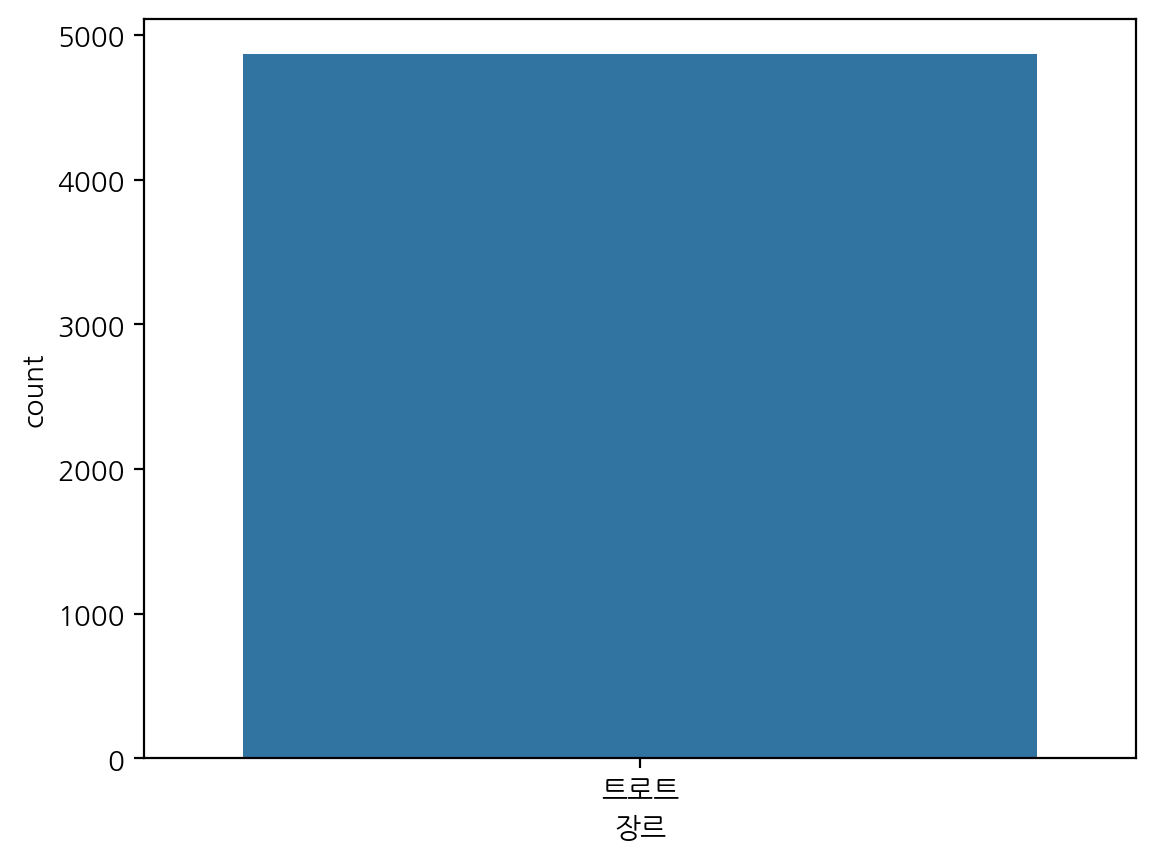

In [12]:
# 데이터 확인
_ = sns.countplot(data=all, x="장르")

In [ ]:
all.to_csv('trot_total.csv', index=False)

In [55]:
# 다운캐스트 하기
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46707 entries, 0 to 46706
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      46707 non-null  object
 1   가사      46707 non-null  object
 2   장르      46707 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [56]:
all["장르"] = all["장르"].astype("category")

In [57]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46707 entries, 0 to 46706
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   제목      46707 non-null  object  
 1   가사      46707 non-null  object  
 2   장르      46707 non-null  category
dtypes: category(1), object(2)
memory usage: 775.7+ KB


In [58]:
# parquet 로 저장하기
all.to_parquet("all_append_csv.gzip", compression="gzip")

In [59]:
pd.read_parquet("all_append_csv.gzip")

,제목,가사,장르
0,무지개 (Rainbow) (Feat. 조용휘),동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...,뮤지컬
1,나 주는 줄 알고 손 내밀었잖아,넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...,뮤지컬
2,너와나,이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...,뮤지컬
3,나만의 언어 rep.,"(좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...",뮤지컬
4,여기는 엄마 컴퍼니,어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...,뮤지컬
...,...,...,...
46702,하루살이,저 멀리 희미하게\r\n반짝이는 빛이 보이네\r\n난 어둠을 피하려는 하루살이\r\...,힙합
46703,Sniper Sound,Double S Oh\r\nDouble S Oh\r\nDouble S Oh\r\ny...,힙합
46704,내 곁에 살게 하고 싶어서 (Feat. 서령),아직도 내겐 눈물이 많아서\r\n니 사진 다시\r\n꺼내지도 못해 난\r\n세상엔 ...,힙합
46705,It's True (Feat. 백지영),꿈이 아니길 바랬어 Oh\r\n그녀가 내게 말했어\r\n꿈이 아니길 바랬어\r\n어...,힙합
